In [2]:
import matplotlib.pyplot as plt

The set cost function is ignored! LCB acquisition does not make sense with cost.


<Figure size 1440x432 with 0 Axes>

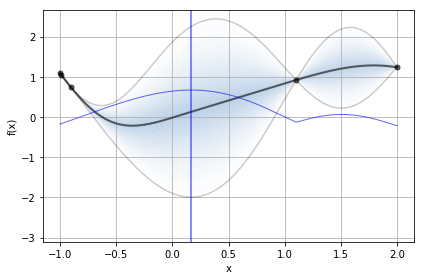

In [9]:
import seaborn as sns
import numpy as np

%matplotlib inline

bounds = np.array([[-1.0, 2.0]])
noise = 0.001

def f(X, noise=noise):
    return -np.sin(2*X) - X**2 + X + noise * np.random.randn(*X.shape)

X_init = np.array([[-0.9], [1.1]])
Y_init = f(X_init)

import GPy
import GPyOpt
from GPyOpt.methods import BayesianOptimization

#kernel = GPy.kern.Matern52(input_dim=1, variance=1.0, lengthscale=1.0)
kernel = GPy.kern.RBF(input_dim=1,variance=1, lengthscale=1e5)

optimizer = BayesianOptimization(f=f, 
                                 domain=[{'name': 'X', 'type': 'continuous', 'domain': bounds.ravel()}],
                                 model_type='GP',
                                 kernel=kernel,
                                 acquisition_type ='LCB',
                                 acquisition_jitter = 0.01,
                                 X=X_init,
                                 Y=-Y_init,
                                 noise_var = noise**2,
                                 exact_feval=False,
                                 normalize_Y=False,
                                 maximize=True)

optimizer.run_optimization(max_iter=3)
plt.figure(figsize=[20,6])
optimizer.plot_acquisition()
